In [33]:
import pickle as sodium_sticks
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize, NonlinearConstraint, LinearConstraint

In [28]:
sensor_data = None
with open('data_sensors.pickle', 'rb') as input_file:
    sensor_data = sodium_sticks.load(input_file)

Let's set up our loss function:

In [29]:
d = 2
n = 10
def loss(arguments: np.ndarray):
    x = arguments.reshape([n, d])
    return np.sum(np.array([np.linalg.norm((x[i] - x[j]) - n_ij * np.dot(x[i] - x[j], n_ij),
                                           ord=2) for i, j, n_ij in sensor_data.values()]))

Also, we need a constraint in order for $x_i$ not to become zero: first let's try the simplest approach and require all $x_i$ have
their norm greater that certain $\delta$

In [30]:
def build_constraint(delta: float):
    return NonlinearConstraint(fun=lambda x: np.linalg.norm(x.reshape([n, d]), axis=-1),
                               lb=delta,
                               ub=np.inf)

In [ ]:
deltas = np.linspace(2.0, 10.0, 19)
results = [minimize(fun=loss,
                  x0=np.random.uniform(size=n*d),
                  method='trust-constr',
                  constraints=build_constraint(delta),
                  options={
                      'maxiter': 3000,
                      'verbose': 2,
                  }) for delta in deltas]

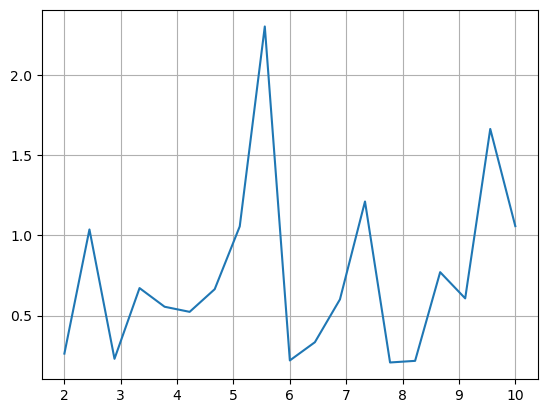

In [144]:
values = np.array([result['fun'] for result in results])
plt.plot(deltas, values)
plt.grid(True)
plt.show()

In [77]:
for i, result in enumerate(results):
    print(f'{i} - {result["success"]}')

0 - False
1 - False
2 - False
3 - True
4 - True
5 - False
6 - False
7 - True
8 - True
9 - True
10 - True
11 - True
12 - False
13 - False
14 - False
15 - False
16 - False
17 - False
18 - False


Let's take some successful results and plot them to see that our approach works:

In [133]:
def plot_once(index: int):
    points = results[index]['x'].reshape([n, d])
    for x, y in points:
        plt.scatter(x, y)
    plt.grid(True)
    plt.show()

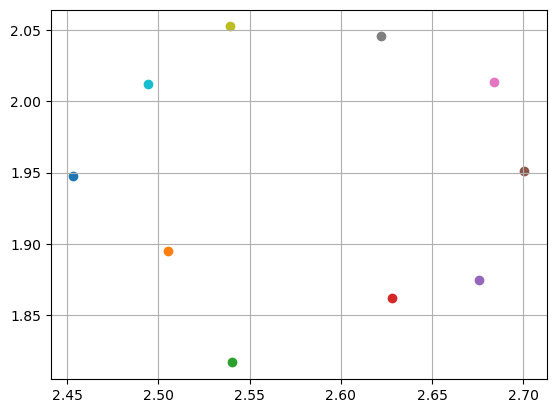

In [141]:
plot_once(2)

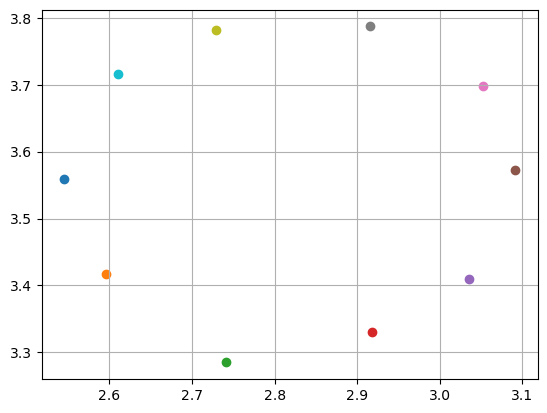

In [142]:
plot_once(5)

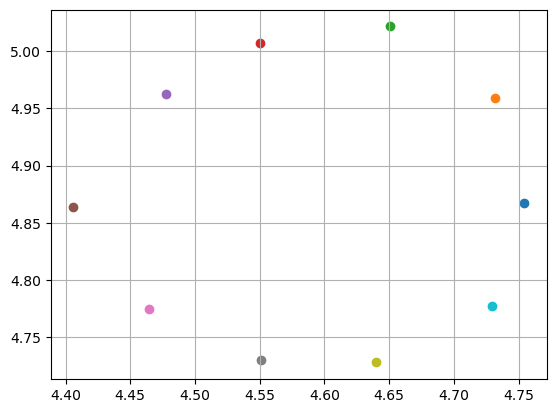

In [143]:
plot_once(10)

The points in the last picture seems mirrored compared to the previous two, but this is fine since our problem
is invariant to scaling, transition and mirroring of all points.